In this study,w e will look at a sms spam collection dataset and predict whether or not the message is spam or ham

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../TextFiles/smsspamcollection.tsv', sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [8]:
df['message'].iloc[4]

"Nah I don't think he goes to usf, he lives around here though"

In [9]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [11]:
df[df['message'].str.isspace()]

,label,message,length,punct


<AxesSubplot:xlabel='length', ylabel='punct'>

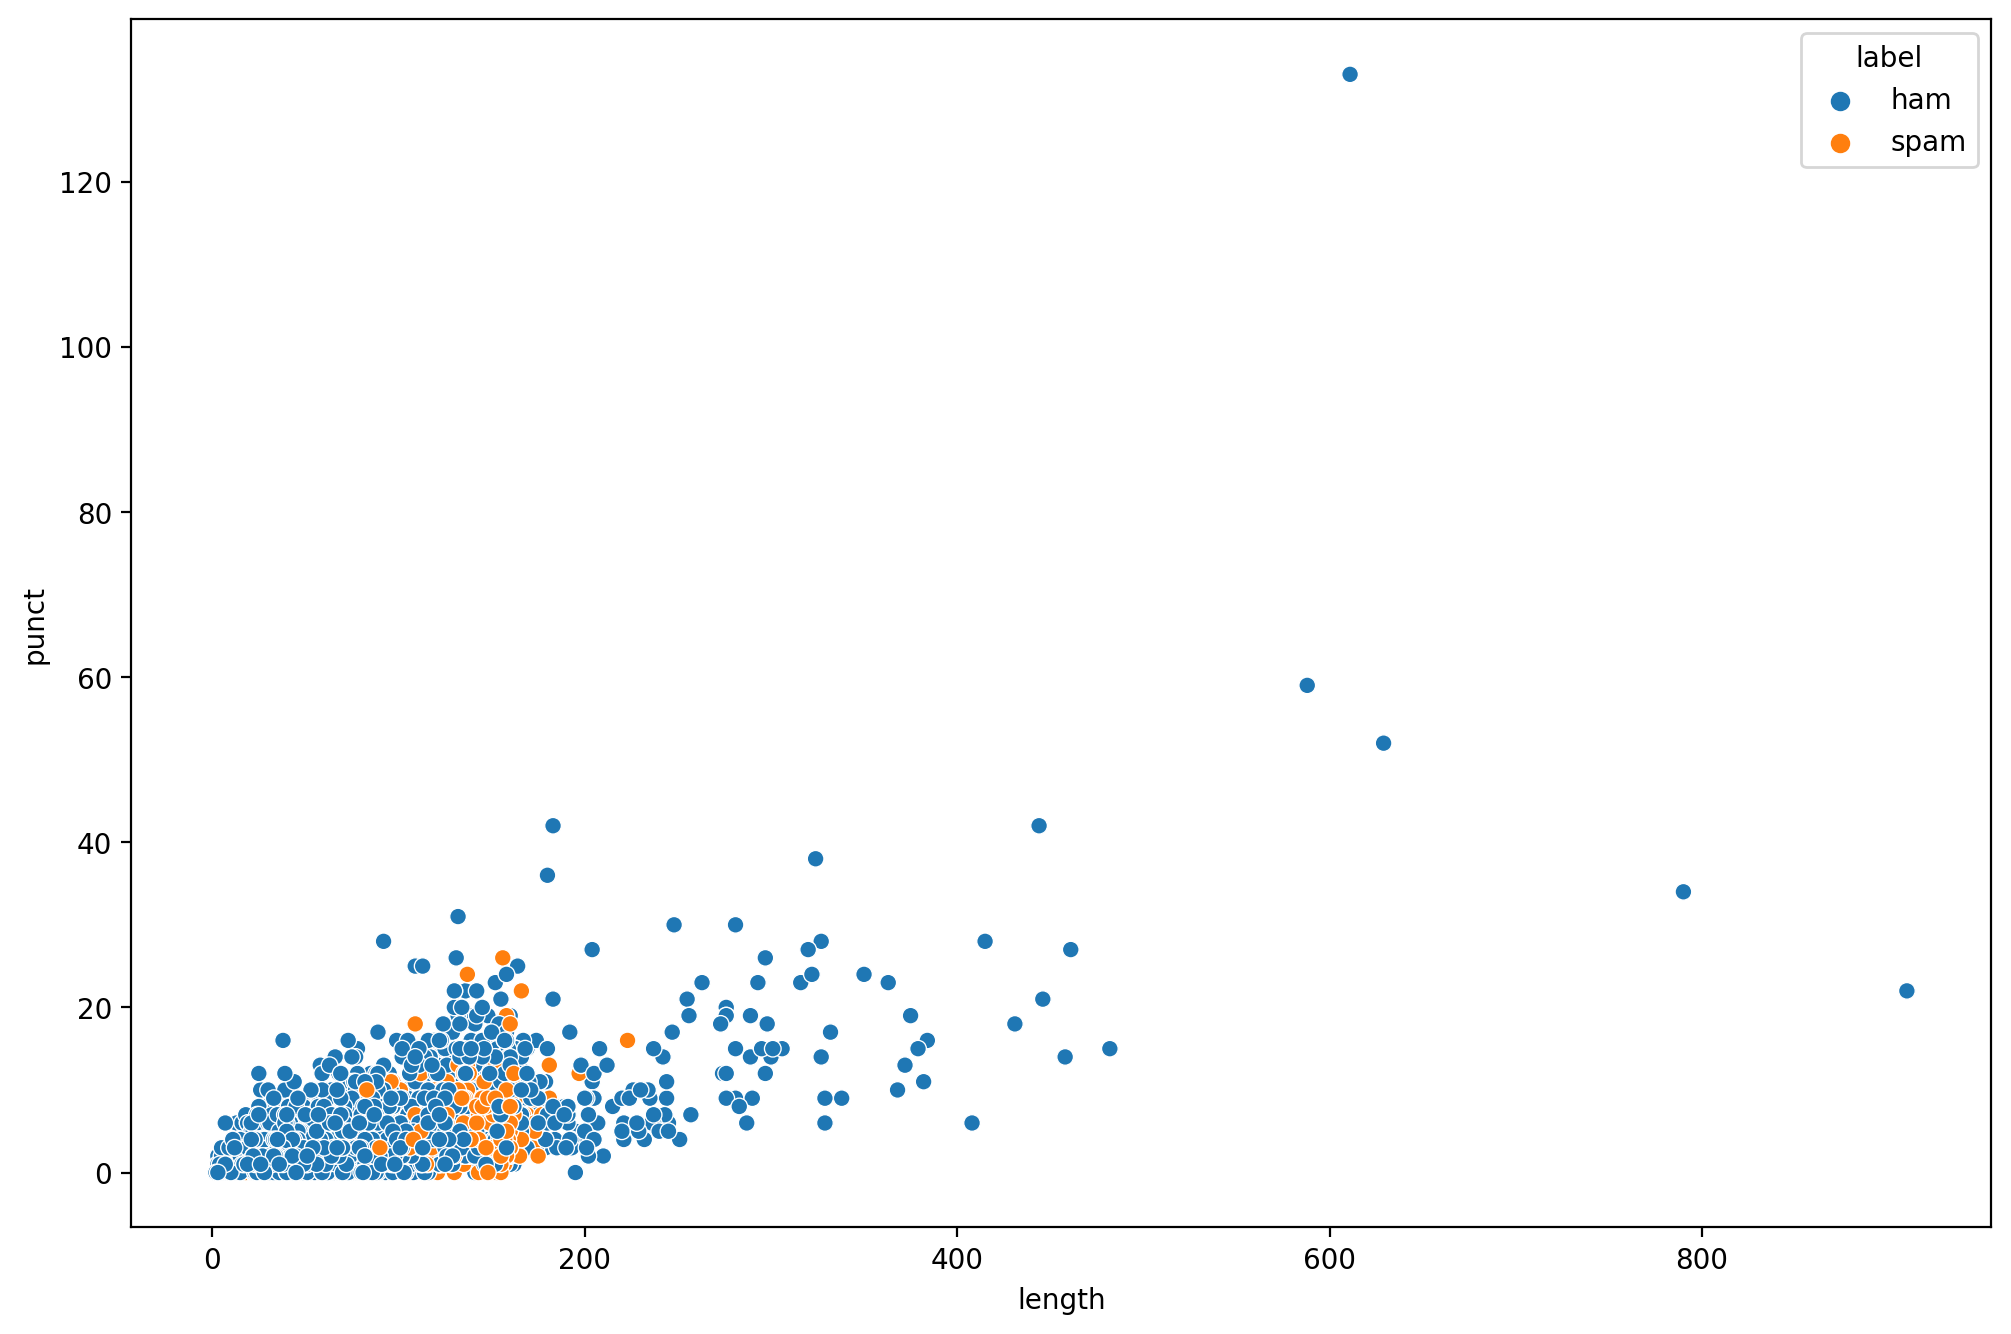

In [16]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x='length', y='punct', hue='label')

(0.0, 30.0)

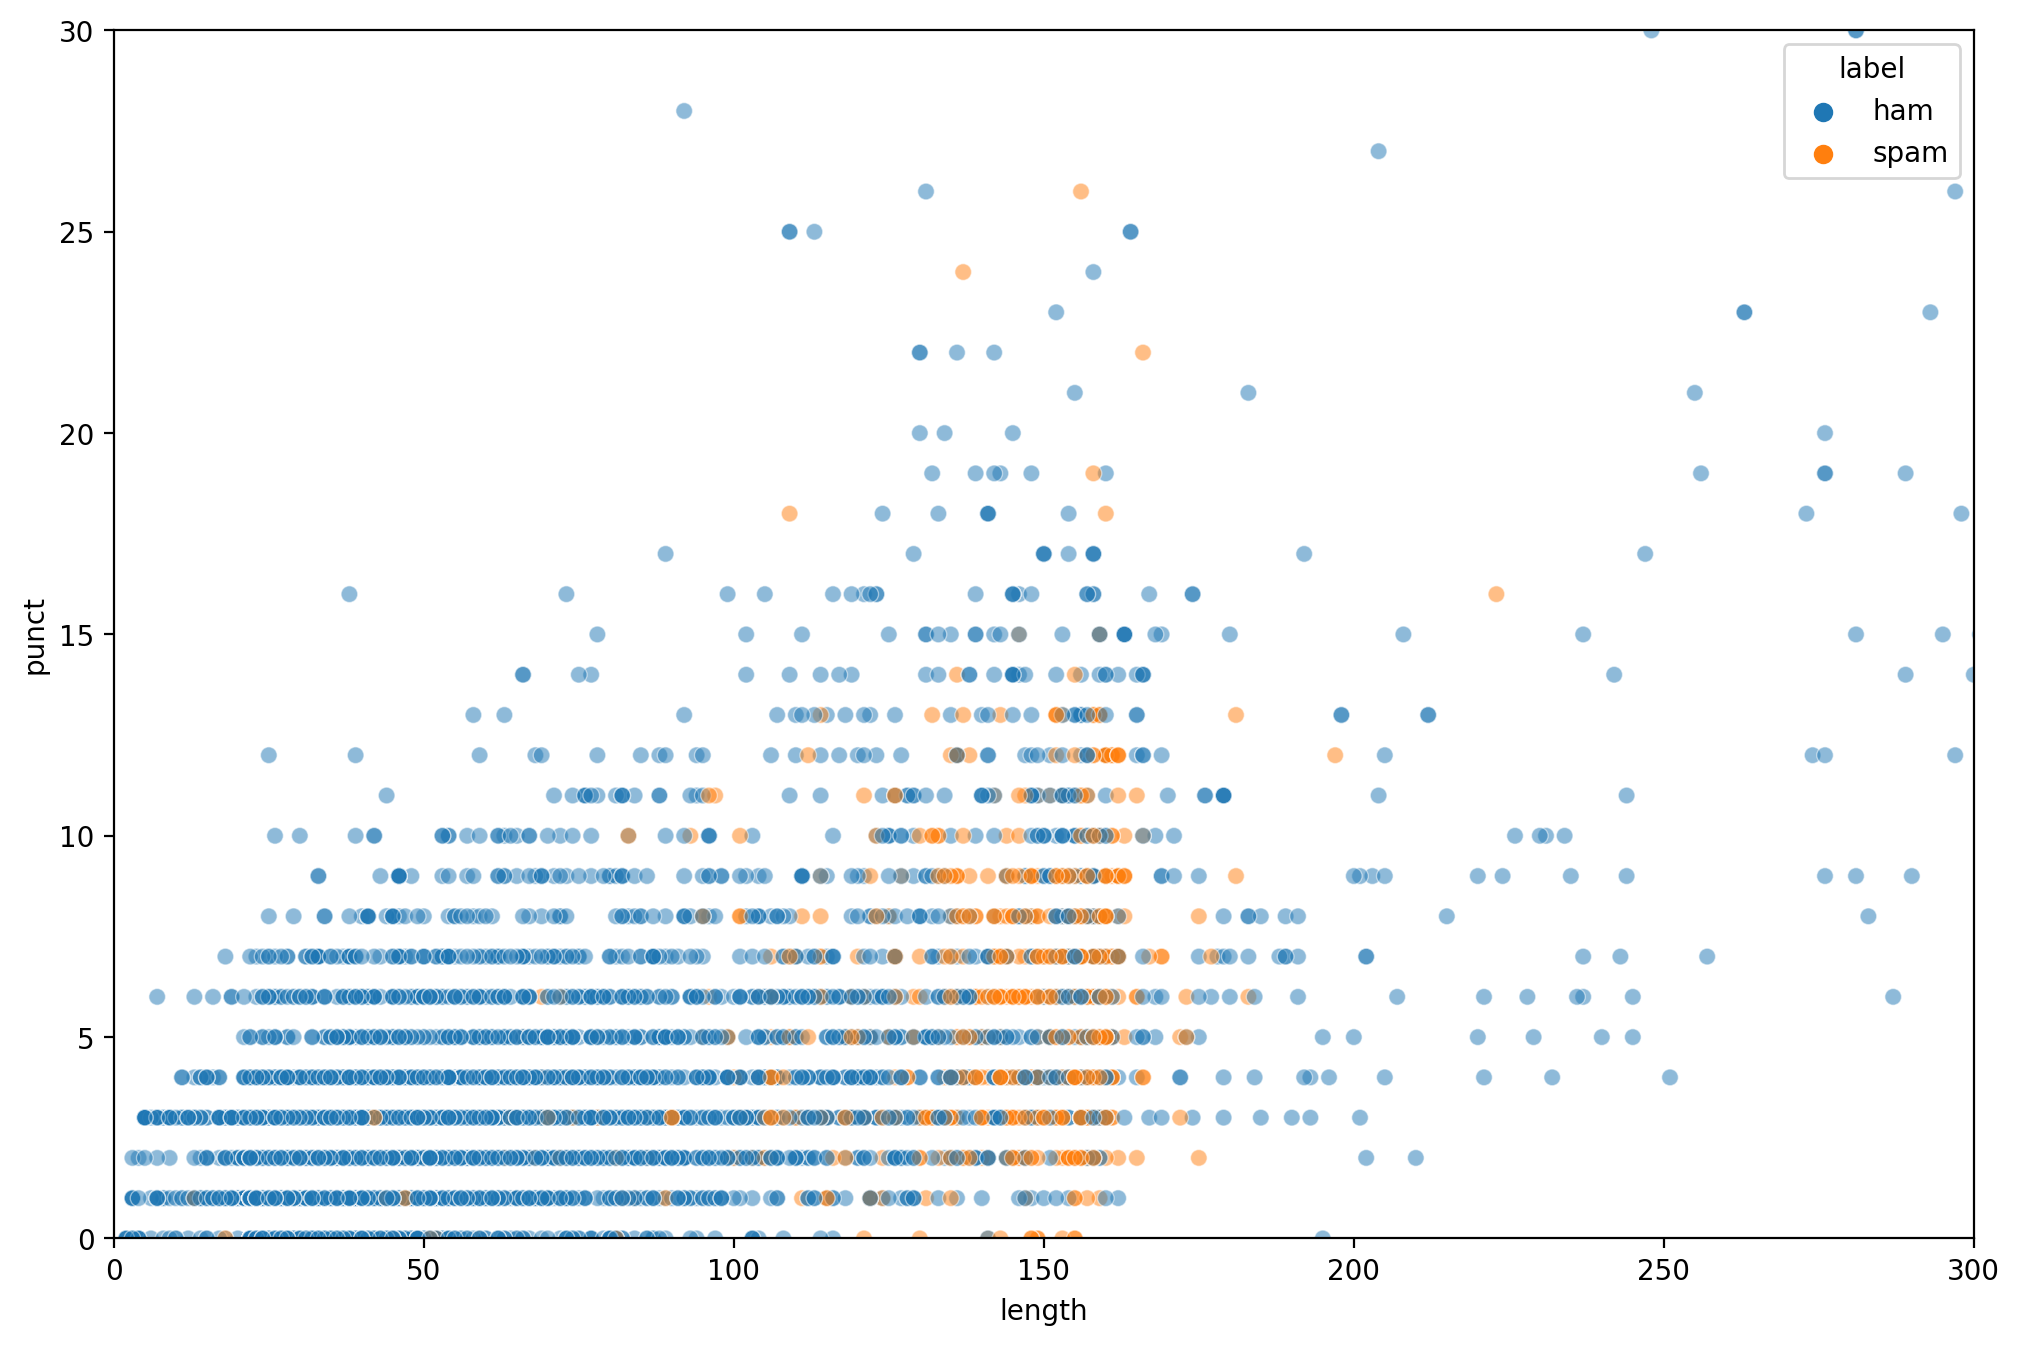

In [18]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x='length', y='punct', hue='label', alpha=0.5)
plt.xlim(0,300)
plt.ylim(0,30)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
from sklearn.pipeline import Pipeline

In [21]:
from sklearn.svm import SVC

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

In [26]:
X = df['message']

In [27]:
y = df['label']

In [28]:
len(df)

5572

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [32]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

In [45]:
from sklearn.model_selection import GridSearchCV

In [62]:
from sklearn.naive_bayes import MultinomialNB

In [75]:
from sklearn.linear_model import LogisticRegression

In [87]:
log_reg = LogisticRegression()

In [88]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100],
              'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
             'solver': ['saga'],
             'max_iter': [1000]}

In [89]:
model = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

In [85]:
tfidf = TfidfVectorizer()

In [86]:
scaled_X_train = tfidf.fit_transform(X_train)

In [91]:
model.fit(scaled_X_train, y_train)

C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ d

C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is '

C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ di

C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ d

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'max_iter': [1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga']},
             scoring='accuracy')

In [93]:
model.best_estimator_

LogisticRegression(C=100, l1_ratio=0.1, max_iter=1000, penalty='elasticnet',
                   solver='saga')

In [100]:
scaled_X_test = tfidf.transform(X_test)

In [101]:
y_preds = model.predict(scaled_X_test)

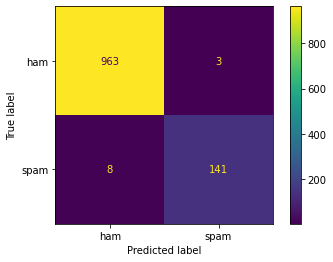

In [103]:
plot_confusion_matrix(model, scaled_X_test, y_test)

In [104]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.98      0.95      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [107]:
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100],
             'kernel': ['linear', 'rbf', 'poly'],
             'gamma': ['scale', 'auto'],
             'degree': [2,3]}

In [126]:
def run_model(model, param_grid, X_train, X_test, y_train, y_test):
    tfidf = TfidfVectorizer()
    scaled_X_train = tfidf.fit_transform(X_train)
    scaled_X_test = tfidf.transform(X_test)
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid.fit(scaled_X_train, y_train)
    print(grid.get_params())
    y_preds = grid.predict(scaled_X_test)
    plot_confusion_matrix(grid, scaled_X_test, y_test)
    print(classification_report(y_test, y_preds))

In [106]:
svm = SVC()

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.99      0.94      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



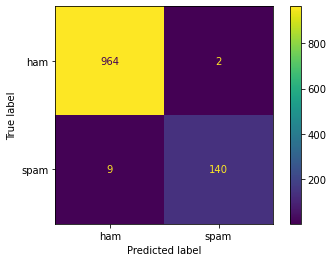

In [108]:
run_model(svm, param_grid, X_train, X_test, y_train, y_test)

In [110]:
mnb = MultinomialNB()

In [122]:
param_grid = {'alpha': np.logspace(0,-9,10)}

{'cv': 5, 'error_score': nan, 'estimator__alpha': 1.0, 'estimator__class_prior': None, 'estimator__fit_prior': True, 'estimator': MultinomialNB(), 'n_jobs': None, 'param_grid': {'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': 'accuracy', 'verbose': 0}
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.99      0.93      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115



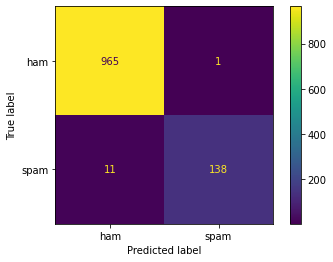

In [127]:
run_model(mnb, param_grid, X_train, X_test, y_train, y_test)